In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from fastai.vision.all import *
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

/kaggle/input/wm811k-wafer-map/LSWMD.pkl


In [2]:
import sys
import pandas as pd
import pickle

# Fix pandas internal module paths
sys.modules['pandas.indexes'] = pd.core.indexes
sys.modules['pandas.indexes.base'] = pd.core.indexes.base

# Load pickle with correct encoding (Python 2 → Python 3)
path = '/kaggle/input/wm811k-wafer-map/LSWMD.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [3]:
from PIL import Image
label_names = [
    "Center",
    "Edge-Loc",
    "Edge-Ring",
    "Loc",
    "Random",
    "Scratch",
    "Near-full",
    "None"
]

def fix_failure_type(x):
    if x is None or len(x) == 0:
        return "None"
    return label_names[int(np.argmax(x))]

data["failureType"] = data["failureType"].apply(fix_failure_type)
def get_wmap(row):
    return Image.fromarray(row["waferMap"].astype(np.uint8))

def get_ftype(row):
    return row["failureType"]

In [4]:
wmap_dblock = DataBlock(blocks = (ImageBlock, CategoryBlock), get_x = get_wmap, get_y = get_ftype, splitter=RandomSplitter(valid_pct=0.2, seed=42), item_tfms = Resize(224, method = "squish"))

In [5]:
dls = wmap_dblock.dataloaders(data)

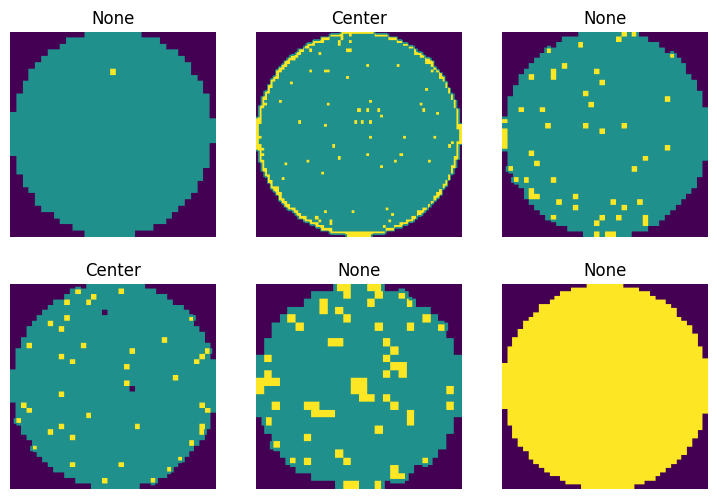

In [6]:
dls.show_batch(max_n = 6)

In [7]:
learner = vision_learner(dls, "resnet34", metrics = error_rate)
learner.fine_tune(3)

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.264816,0.250239,0.114578,21:54


epoch,train_loss,valid_loss,error_rate,time
0,0.228925,0.472268,0.208767,30:14
1,0.214872,0.214323,0.101028,30:14
2,0.186838,0.185702,0.083535,30:14


In [8]:
learner.export('/kaggle/working/wafer_model_v1.pkl')